# 스티커 코드

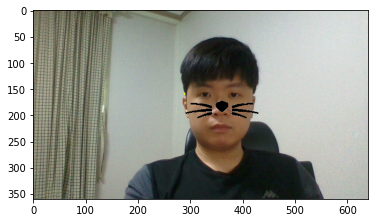

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)



for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)


img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)


for dlib_rect, landmark in zip(dlib_rects, list_landmarks):

    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()+10
    h = dlib_rect.width()+15


    
    
    
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))



refined_x = x - w//2+4   # left
refined_y = y -h//2      # top






if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]
    refined_y = 0


sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()



# 회고

## 구현시 어려웠던 점

- y좌표가 음수일 경우 처리를 잘못하여 처음에 시행착오를 겪음
- 스티커가 맞는 좌표에 나오긴했으나 스티커의 위치와 얼굴 네모상자의 위치가 조금 어긋나서 네모와 랜드마크들이 출력되는 문제가 발생함. 스티커의 좌표와 스티커의 크기를 보정하기위해 숫자를 넣어 네모와 랜드마크를 지우는것 해결.

## 문제점에 대한 답변
- 시간이 부족하여 추측기반 생각을 말씀드리겠습니다.
1. 얼굴의 각도에 따라 스티커가 어떻게 변해야할까?
- 스티커 또한 얼굴에 각도에 맞게 회전을 해야한다.

2. 멀리서 촬영하면 안될까요?, 옆으로 누워서 촬영하면 왜안될까요?
- 멀리서 촬영할 때나 옆으로 누워서 촬영할 때나 랜드마크가 잘 찍히지 않을 것임.
 
3. 실행속도가 중요할까요?
- 동영상에 스티커를 붙일 경우에는 실행속도가 중요하나 사진에 스티커를 붙이는 경우 실행속도가 그렇게 중요하지는 않을 것 같습니다.

4. 스티커앱을 만들때 정확도가 얼마나 중요할까요?
- 스티커를 스티커가 정확한 위치에 붙여지지 않을 경우 사용자의 만족도가 매우 떨어질 것으로 생각됩니다.
